<a href="https://colab.research.google.com/github/vivek6311/Artificial-Intelligence-with-Python/blob/master/Mizoram_IPD_%26_OPD_Runs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

In [4]:
df= pd.read_excel('/content/OPD & IPD Combined MiZoram.xlsx')

In [5]:
df.head()

,organisation unit .me,assessment type,assessment period (select starting date of quarter for which assessment is being done),calculated value (p1),either registration slip or a referral slip for treatment given with details of the department or hospital needed to visit (p1),level of satisfaction with the availability of sufficient information in the facility and hospital (p1),level of satisfaction with the waiting time for the screening test and exami.tion (p1),level of satisfaction with the amenities in the waiting area (p1),level of satisfaction with the attitude of the doctor and other health staff (p1),health staff explained about the diagnosis (p1),diagnosis (p1),doctor or pharmacist explain how to use medicines (p1),go outside to purchase the drugs from pharmacy (p1),level of satisfaction with the services provided to you by the hospital? (p1),recommend this health centre and hospital to your relatives (p1),"rate the cleanliness of the facility such as ward, bathrooms & toilets, bedsheets, pillow covers etc?(p1)",department .me
0,Lawngtlai DH,Ex-Post Assessment,2024-07-01,75,1,Acceptable,Acceptable,Acceptable,Satisfied,1,Acceptable,0,1,Satisfied,1,Acceptable,OPD
1,Champhai DH,Ex-Post Assessment,2024-07-01,85,1,Satisfied,Acceptable,Acceptable,Satisfied,1,Acceptable,1,1,Satisfied,1,Satisfied,OPD
2,State Refferal Hospital,Ex-Post Assessment,2024-07-01,87,1,Satisfied,Acceptable,Satisfied,Satisfied,1,Acceptable,1,1,Satisfied,1,Satisfied,OPD
3,Lunglei DH,Ex-Post Assessment,2024-07-01,72,1,Acceptable,Acceptable,Satisfied,Satisfied,1,Acceptable,1,1,Satisfied,1,Acceptable,IPD
4,Lawngtlai DH,Ex-Post Assessment,2024-07-01,76,1,Satisfied,Satisfied,Satisfied,Satisfied,1,Acceptable,1,1,Satisfied,1,Satisfied,OPD


In [9]:
# Split the DataFrame: keep first 4 columns as-is, and one-hot encode the rest
df_fixed = pd.concat([
    df.iloc[:, :4],  # First 4 columns unchanged
    pd.get_dummies(df.iloc[:, 4:], drop_first=False, dtype=int)  # One-hot encode from 5th column onward
], axis=1)

# Save to df1
df1 = df_fixed

In [11]:
# View the new DataFrame
df1.head()

,organisation unit .me,assessment type,assessment period (select starting date of quarter for which assessment is being done),calculated value (p1),either registration slip or a referral slip for treatment given with details of the department or hospital needed to visit (p1),health staff explained about the diagnosis (p1),doctor or pharmacist explain how to use medicines (p1),go outside to purchase the drugs from pharmacy (p1),recommend this health centre and hospital to your relatives (p1),level of satisfaction with the availability of sufficient information in the facility and hospital (p1)_Acceptable,...,level of satisfaction with the services provided to you by the hospital? (p1)_Acceptable,level of satisfaction with the services provided to you by the hospital? (p1)_Fully Satisfied,level of satisfaction with the services provided to you by the hospital? (p1)_Not Satisfied,level of satisfaction with the services provided to you by the hospital? (p1)_Satisfied,"rate the cleanliness of the facility such as ward, bathrooms & toilets, bedsheets, pillow covers etc?(p1)_Acceptable","rate the cleanliness of the facility such as ward, bathrooms & toilets, bedsheets, pillow covers etc?(p1)_Fully Satisfied","rate the cleanliness of the facility such as ward, bathrooms & toilets, bedsheets, pillow covers etc?(p1)_Not Satisfied","rate the cleanliness of the facility such as ward, bathrooms & toilets, bedsheets, pillow covers etc?(p1)_Satisfied",department .me_IPD,department .me_OPD
0,Lawngtlai DH,Ex-Post Assessment,2024-07-01,75,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,1
1,Champhai DH,Ex-Post Assessment,2024-07-01,85,1,1,1,1,1,0,...,0,0,0,1,0,0,0,1,0,1
2,State Refferal Hospital,Ex-Post Assessment,2024-07-01,87,1,1,1,1,1,0,...,0,0,0,1,0,0,0,1,0,1
3,Lunglei DH,Ex-Post Assessment,2024-07-01,72,1,1,1,1,1,1,...,0,0,0,1,1,0,0,0,1,0
4,Lawngtlai DH,Ex-Post Assessment,2024-07-01,76,1,1,1,1,1,0,...,0,0,0,1,0,0,0,1,0,1


In [12]:
# Save df1 to Excel file
df1.to_excel("Mizoram_encoded_data.xlsx", index=False)


**Statistical** **Tests**

In [13]:
from scipy.stats import shapiro, levene, chi2_contingency, pearsonr

In [15]:
# Replace this with your actual df1
# df1 = pd.read_csv("Mizoram_encoded_data.csv")

# Separate columns
numeric_cols = df1.select_dtypes(include=[np.number]).columns
categorical_cols = df1.select_dtypes(exclude=[np.number]).columns

print("=== Descriptive Statistics ===")
print(df1[numeric_cols].describe())

=== Descriptive Statistics ===
       calculated value (p1)  \
count             344.000000   
mean               76.552326   
std                 6.509705   
min                44.000000   
25%                74.000000   
50%                76.000000   
75%                79.000000   
max                90.000000   

       either registration slip or a referral slip for treatment given with details of the department or hospital needed to visit (p1)  \
count                                         344.000000                                                                                 
mean                                            0.994186                                                                                 
std                                             0.076138                                                                                 
min                                             0.000000                                                                        

In [16]:
print("\n=== Shapiro-Wilk Normality Test (on numeric columns) ===")
for col in numeric_cols:
    if df1[col].nunique() > 10:  # Skip binary/constant values
        stat, p = shapiro(df1[col])
        print(f"{col}: W={stat:.4f}, p-value={p:.4f}")


=== Shapiro-Wilk Normality Test (on numeric columns) ===
calculated value (p1): W=0.8786, p-value=0.0000


In [17]:
print("\n=== Levene’s Test for Equality of Variances (between first two numeric cols) ===")
if len(numeric_cols) >= 2:
    col1, col2 = numeric_cols[:2]
    stat, p = levene(df1[col1], df1[col2])
    print(f"{col1} vs {col2}: Levene Stat={stat:.4f}, p-value={p:.4f}")


=== Levene’s Test for Equality of Variances (between first two numeric cols) ===
calculated value (p1) vs either registration slip or a referral slip for treatment given with details of the department or hospital needed to visit (p1): Levene Stat=221.9942, p-value=0.0000


In [18]:
print("\n=== Pearson Correlation Matrix ===")
corr_matrix = df1[numeric_cols].corr(method='pearson')
print(corr_matrix)


=== Pearson Correlation Matrix ===
                                                    calculated value (p1)  \
calculated value (p1)                                            1.000000   
either registration slip or a referral slip for...              -0.005267   
health staff explained about the diagnosis (p1)                  0.220820   
doctor or pharmacist explain how to use medicin...               0.357496   
go outside to purchase the drugs from pharmacy ...              -0.565342   
recommend this health centre and hospital to yo...               0.501856   
level of satisfaction with the availability of ...              -0.220809   
level of satisfaction with the availability of ...               0.189235   
level of satisfaction with the availability of ...              -0.041639   
level of satisfaction with the availability of ...               0.166916   
level of satisfaction with the waiting time for...              -0.130390   
level of satisfaction with the waiting t

In [19]:
print("\n=== Chi-Square Test for Independence (first 2 categorical columns, if any) ===")
if len(categorical_cols) >= 2:
    cat1, cat2 = categorical_cols[:2]
    contingency = pd.crosstab(df1[cat1], df1[cat2])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"{cat1} vs {cat2}: Chi2={chi2:.4f}, p-value={p:.4f}, dof={dof}")
else:
    print("Not enough categorical columns for Chi-Square Test.")


=== Chi-Square Test for Independence (first 2 categorical columns, if any) ===
organisation unit .me vs assessment type: Chi2=0.0000, p-value=1.0000, dof=0


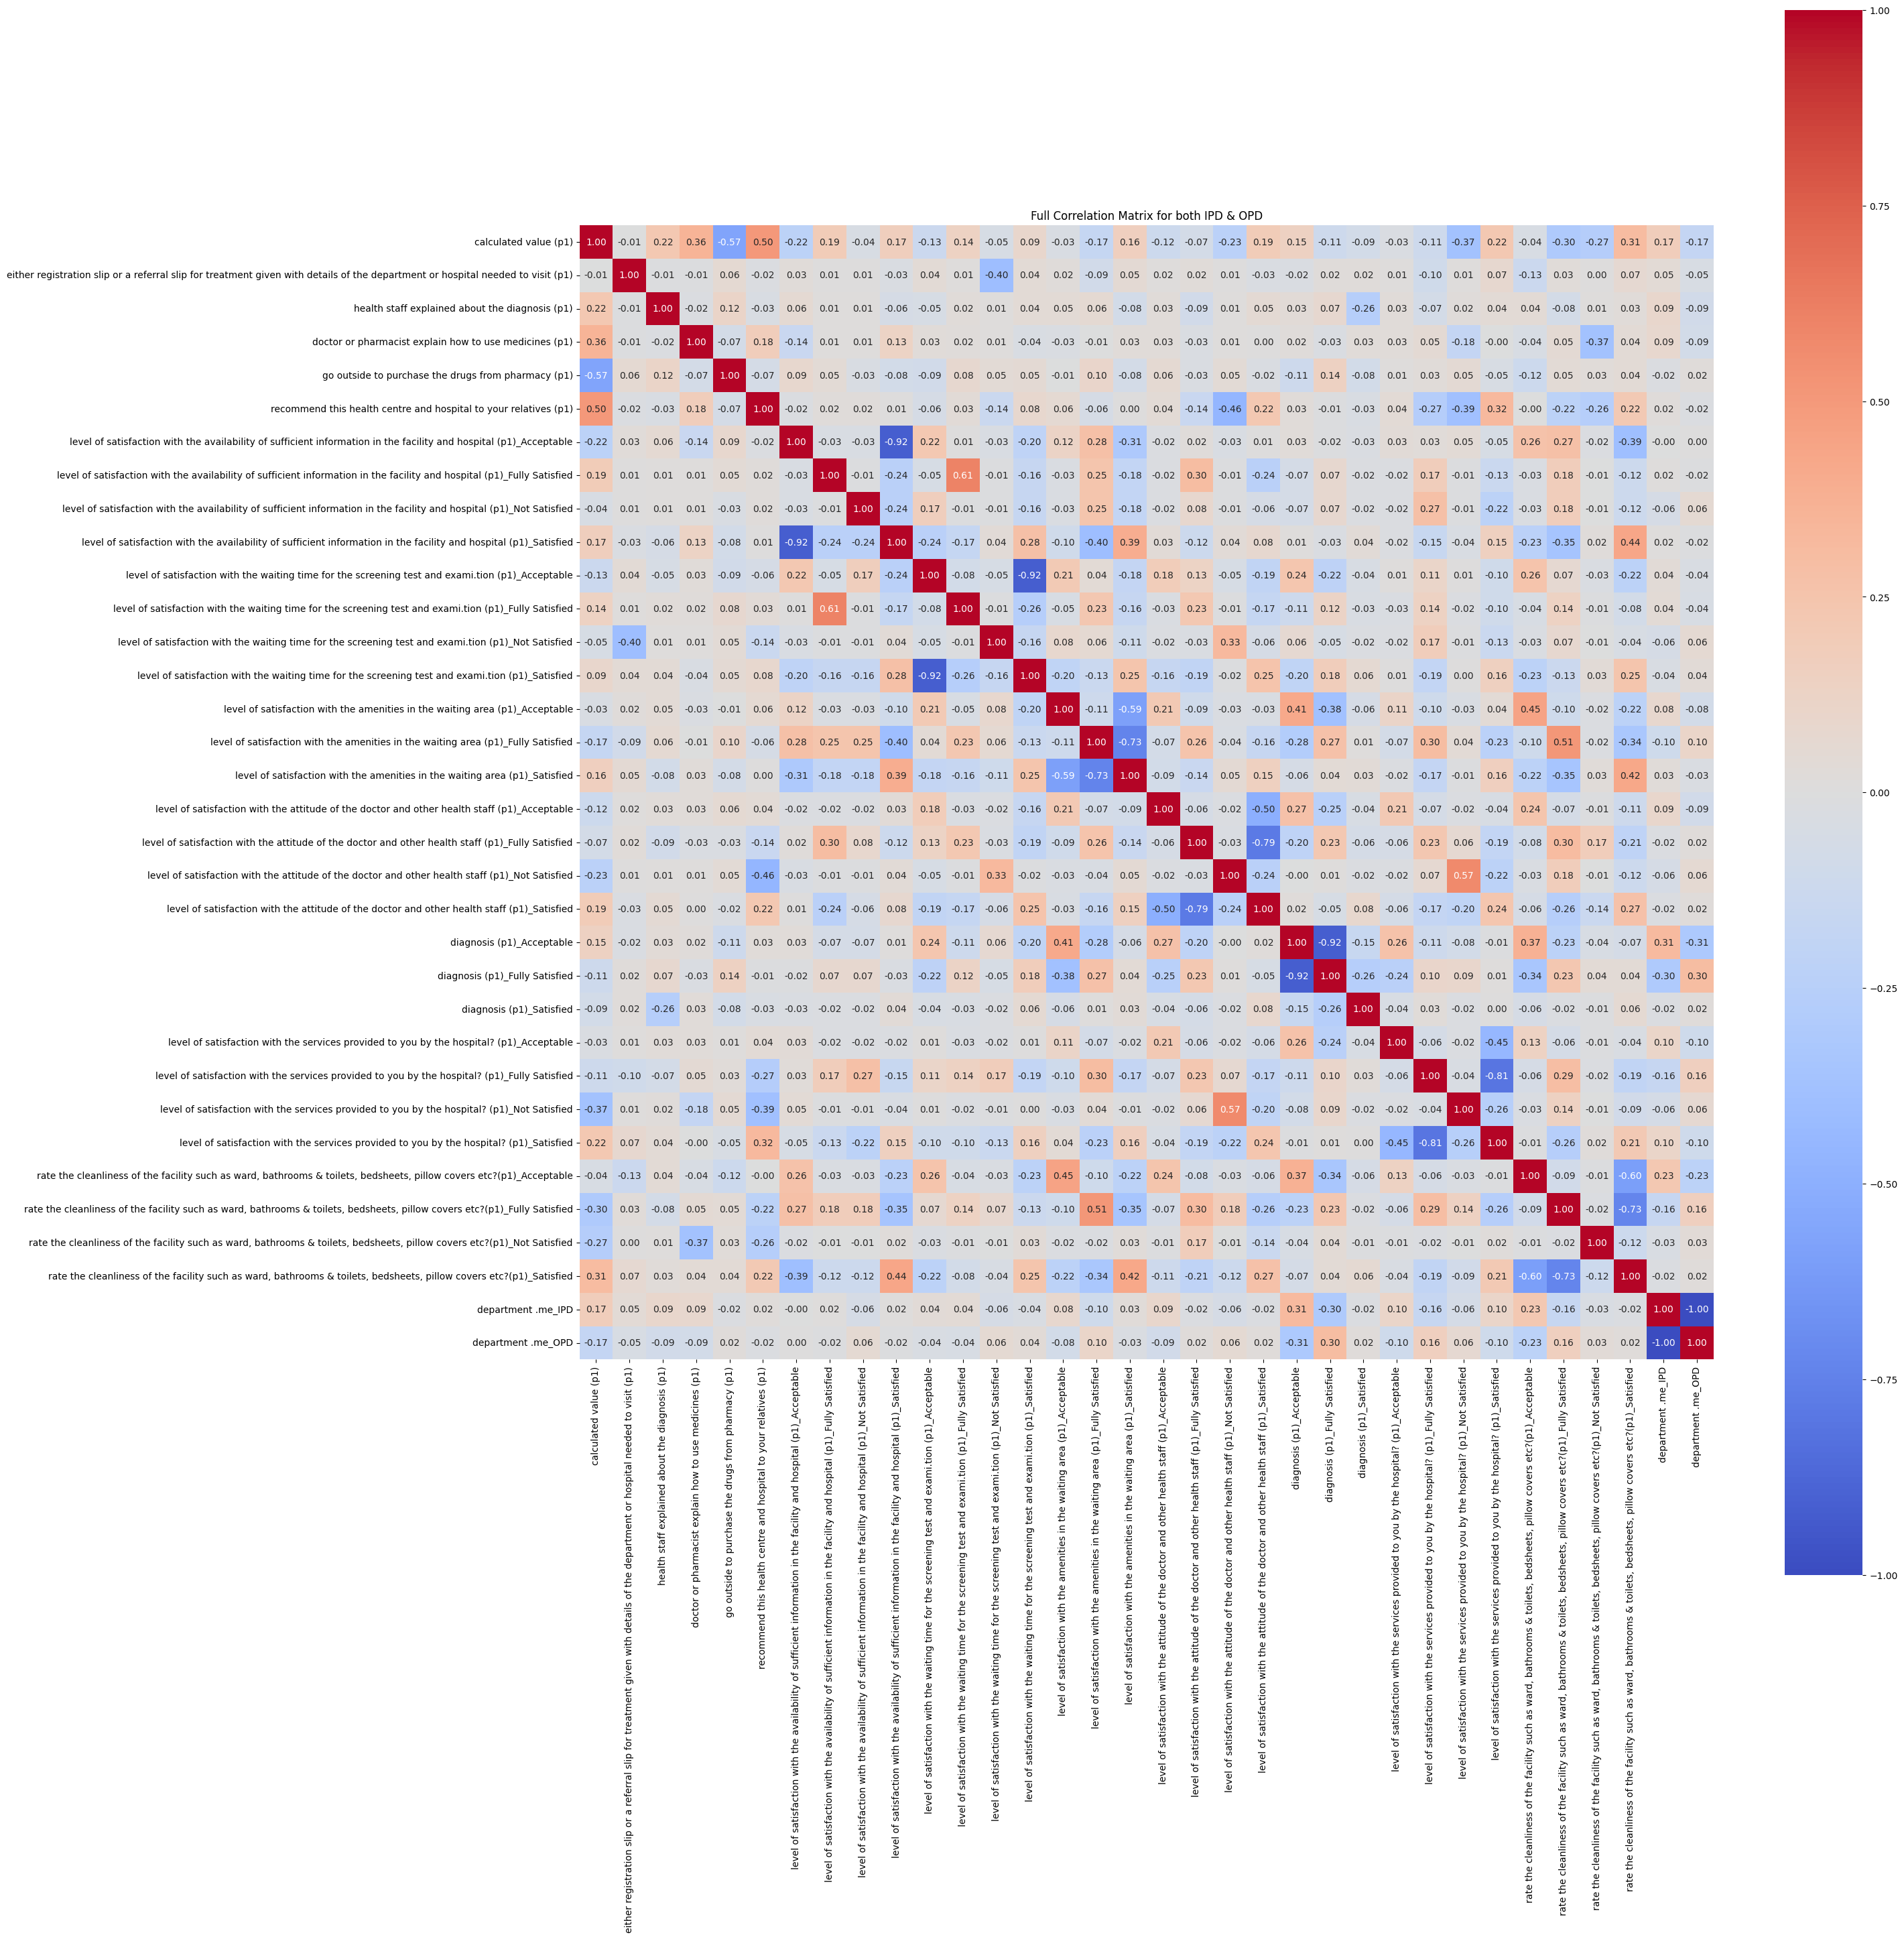

In [27]:
# Calculate correlation matrix
#corr_matrix = df1.corr()

# === 1. Full Correlation Heatmap ===
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title("Full Correlation Matrix for both IPD & OPD")
plt.tight_layout()
plt.show()

In [22]:
# === 2. Top 10 Correlated Variable Pairs (excluding self-correlation) ===
# Unstack matrix and sort
corr_unstacked = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).unstack().dropna()
top_10_corr = corr_unstacked.abs().sort_values(ascending=False).head(10)
top_10_vars = list(set(top_10_corr.index.get_level_values(0)).union(set(top_10_corr.index.get_level_values(1))))


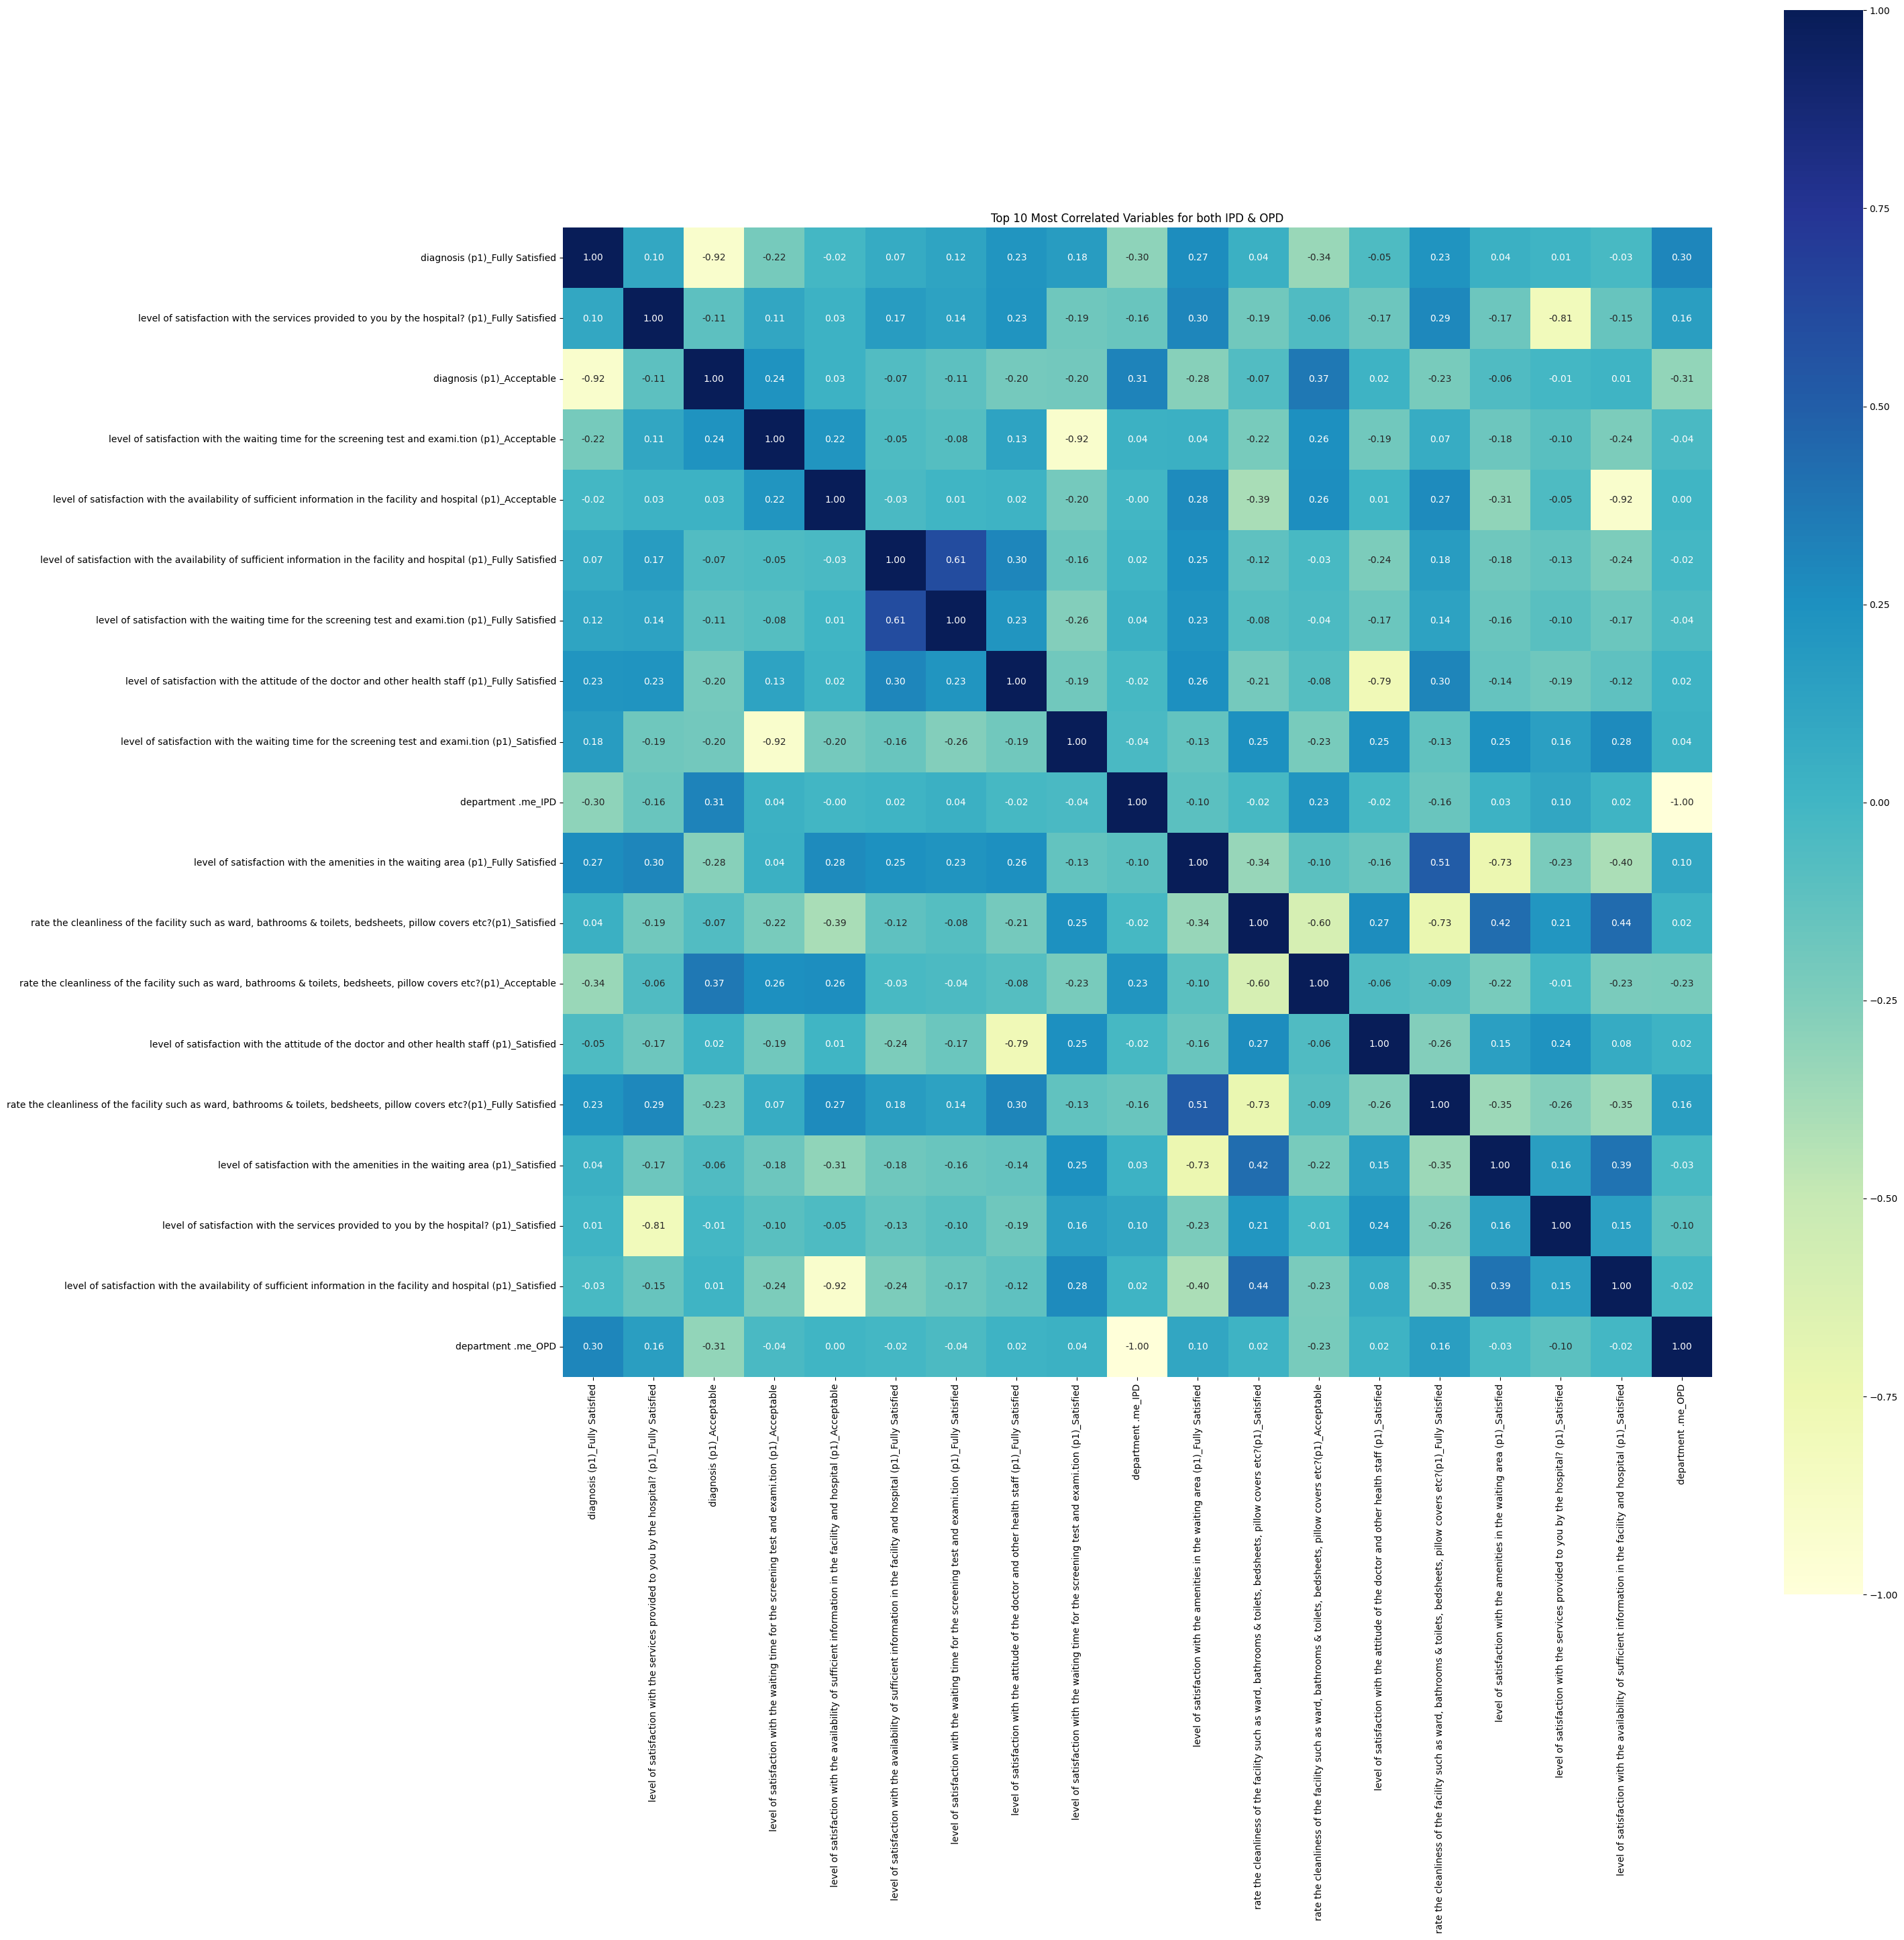

In [28]:
# Heatmap for top 10 variables
plt.figure(figsize=(30, 30))
sns.heatmap(df1[top_10_vars].corr(), cmap='YlGnBu', annot=True, fmt=".2f", square=True)
plt.title("Top 10 Most Correlated Variables for both IPD & OPD")
plt.tight_layout()
plt.show()

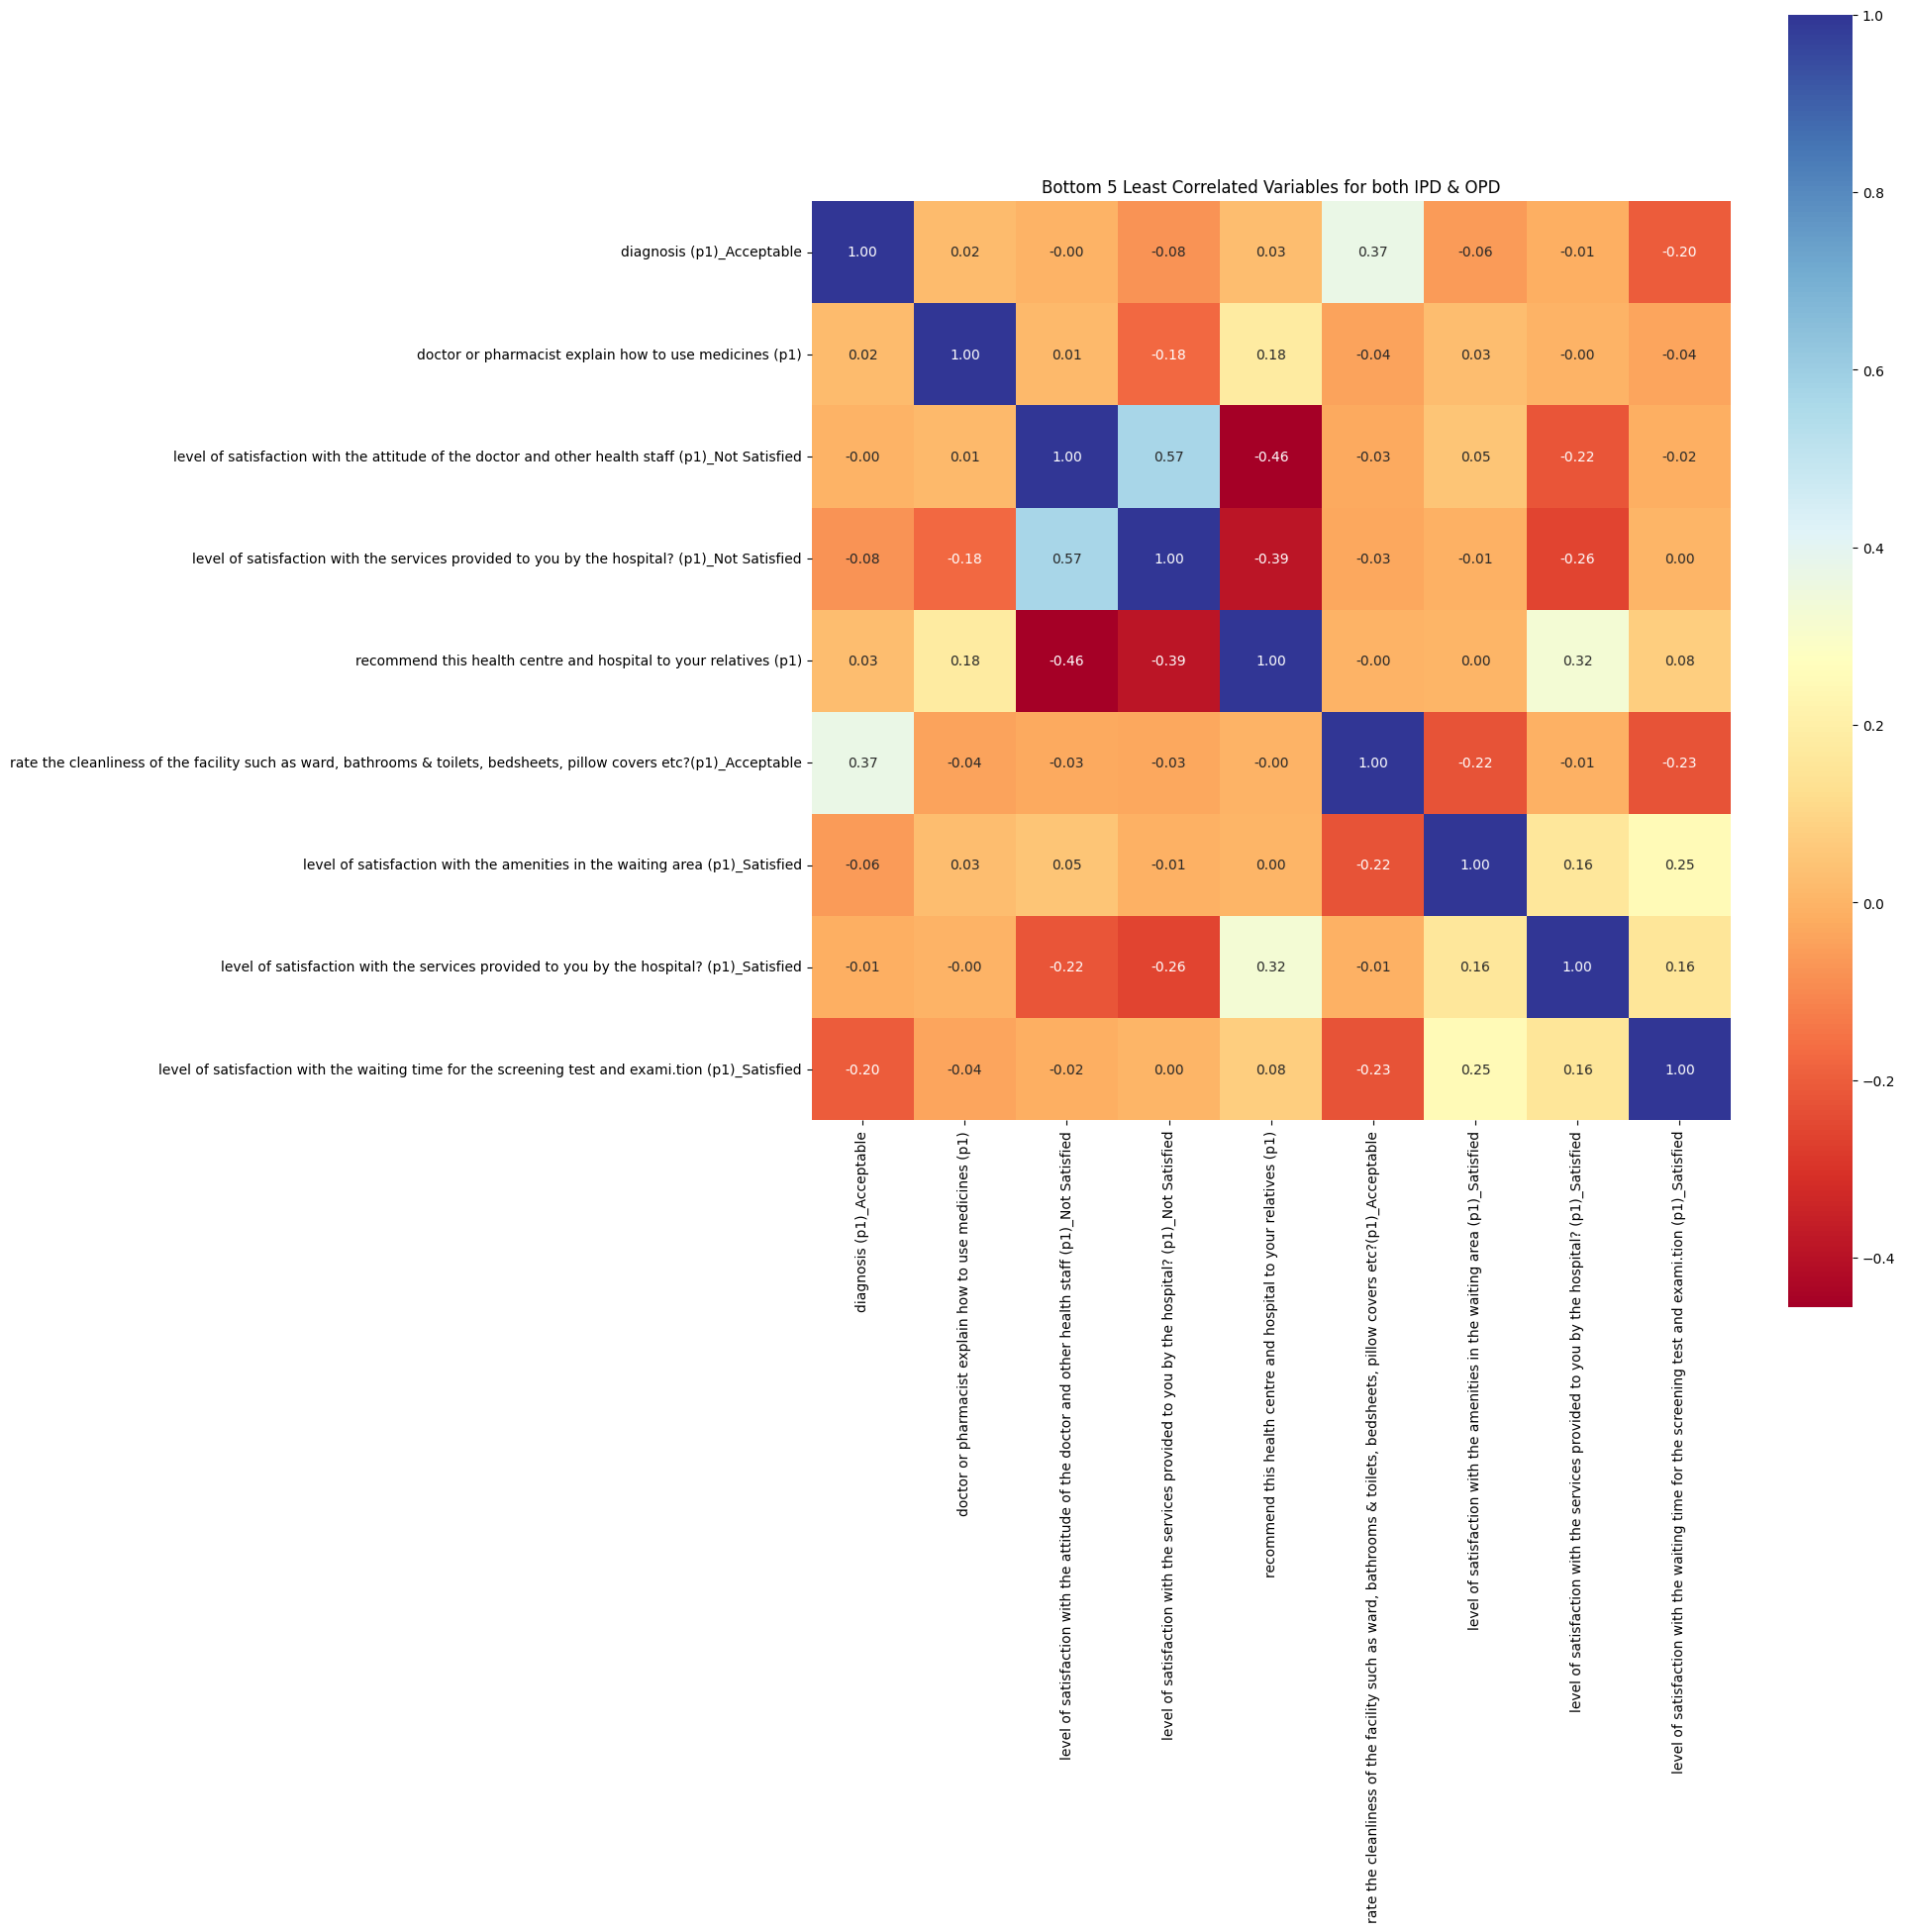

In [29]:
# === 3. Bottom 5 Least Correlated Variable Pairs ===
bottom_5_corr = corr_unstacked.abs().sort_values(ascending=True).head(5)
bottom_5_vars = list(set(bottom_5_corr.index.get_level_values(0)).union(set(bottom_5_corr.index.get_level_values(1))))

# Heatmap for bottom 5 variables
plt.figure(figsize=(20, 20))
sns.heatmap(df1[bottom_5_vars].corr(), cmap='RdYlBu', annot=True, fmt=".2f", square=True)
plt.title("Bottom 5 Least Correlated Variables for both IPD & OPD")
plt.tight_layout()
plt.show()


# **PCA Analysis**

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Drop first three columns (index 0, 1, 2)
PCA_IPD_OPD_Mizoram = df1.iloc[:, 3:].copy()

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(PCA_IPD_OPD_Mizoram)

# Step 3: Run PCA
pca = PCA()
pca_result = pca.fit(scaled_data)

# Step 4: Create a DataFrame of explained variance
explained_variance = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Variance': pca.explained_variance_ratio_.cumsum()
})

# Step 5: Optional — Print explained variance
print("\n=== PCA Explained Variance ===")
print(explained_variance.head(10))  # Top 10 components

# Step 6: Optional — Save the PCA input for further use
# Already saved as PCA_IPD_OPD_Mizoram



=== PCA Explained Variance ===
     PC  Explained Variance Ratio  Cumulative Variance
0   PC1                  0.139549             0.139549
1   PC2                  0.110488             0.250037
2   PC3                  0.076007             0.326044
3   PC4                  0.065849             0.391893
4   PC5                  0.057417             0.449310
5   PC6                  0.051425             0.500735
6   PC7                  0.045013             0.545747
7   PC8                  0.043247             0.588994
8   PC9                  0.040767             0.629761
9  PC10                  0.039466             0.669226


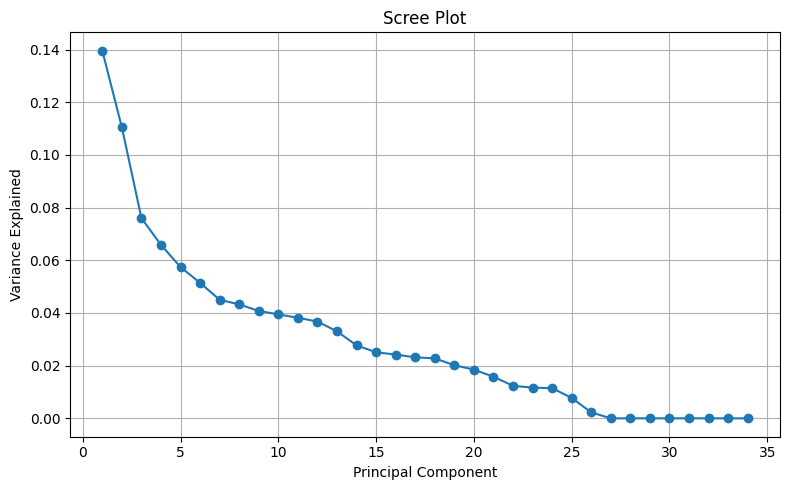

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# Step 1: Get PCA components (loadings)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=PCA_IPD_OPD_Mizoram.columns
)

# Step 2: Show top contributing features for each PC
top_features_per_pc = {}

for i in range(10):  # PC1 to PC10
    pc = f'PC{i+1}'
    # Get absolute values of loadings, sort descending
    top_features = loadings[pc].abs().sort_values(ascending=False).head(10)
    top_features_per_pc[pc] = top_features.index.tolist()

# Step 3: Display results
for pc, features in top_features_per_pc.items():
    print(f"\nTop contributing features to {pc}:")
    for f in features:
        print(f"  - {f}")



Top contributing features to PC1:
  - rate the cleanliness of the facility such as ward, bathrooms & toilets, bedsheets, pillow covers etc?(p1)_Satisfied
  - rate the cleanliness of the facility such as ward, bathrooms & toilets, bedsheets, pillow covers etc?(p1)_Fully Satisfied
  - level of satisfaction with the amenities in the waiting area (p1)_Fully Satisfied
  - level of satisfaction with the availability of sufficient information in the facility and hospital (p1)_Satisfied
  - level of satisfaction with the amenities in the waiting area (p1)_Satisfied
  - level of satisfaction with the services provided to you by the hospital? (p1)_Satisfied
  - level of satisfaction with the attitude of the doctor and other health staff (p1)_Satisfied
  - level of satisfaction with the services provided to you by the hospital? (p1)_Fully Satisfied
  - level of satisfaction with the availability of sufficient information in the facility and hospital (p1)_Acceptable
  - level of satisfaction with

In [33]:
# Create a DataFrame from the top_features_per_pc dictionary
top_features_df = pd.DataFrame.from_dict(top_features_per_pc, orient='index').transpose()

# Save to Excel
output_file = "PCA_Top_Features.xlsx"
top_features_df.to_excel(output_file, index=False)

print(f"Top features for each PC saved to {output_file}")

Top features for each PC saved to PCA_Top_Features.xlsx


# **Clustering Analysis**

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Clustering input data saved to clustering_IPD_OPD_Mizoram_input.xlsx


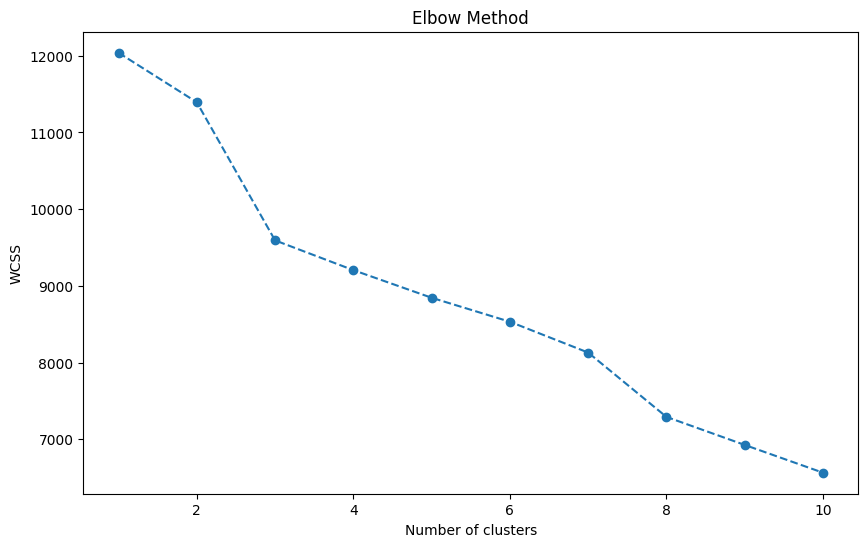


All results saved to clustering_IPD_OPD_Mizoram_results.xlsx with:
- Original data with cluster labels (Data_with_Clusters)
- Cluster analysis of numeric columns only (Cluster_Analysis)
- Scaled numeric input data (Scaled_Input_Data)


In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame
# Exclude first 3 columns for clustering
clustering_data = df1.iloc[:, 3:]

# Save the clustering input data
clustering_input_file = "clustering_IPD_OPD_Mizoram_input.xlsx"
clustering_data.to_excel(clustering_input_file, index=False)
print(f"Clustering input data saved to {clustering_input_file}")

# Standardize the data (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data.select_dtypes(include=['number']))  # Only numeric columns

# Determine optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to original data
df1['Cluster'] = clusters

# Create a single Excel file with multiple sheets
output_file = "clustering_IPD_OPD_Mizoram_results.xlsx"
with pd.ExcelWriter(output_file) as writer:
    # Save original data with clusters
    df1.to_excel(writer, sheet_name='Data_with_Clusters', index=False)

    # Save cluster analysis (only for numeric columns)
    numeric_cols = df1.select_dtypes(include=['number']).columns
    cluster_analysis = df1[numeric_cols].groupby('Cluster').mean()
    cluster_analysis.to_excel(writer, sheet_name='Cluster_Analysis')

    # Save the scaled input data for reference
    pd.DataFrame(scaled_data, columns=clustering_data.select_dtypes(include=['number']).columns).to_excel(
        writer, sheet_name='Scaled_Input_Data', index=False)

print(f"\nAll results saved to {output_file} with:")
print("- Original data with cluster labels (Data_with_Clusters)")
print("- Cluster analysis of numeric columns only (Cluster_Analysis)")
print("- Scaled numeric input data (Scaled_Input_Data)")